In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\Akshat\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
if tf.config.list_physical_devices('GPU'):
    print('GPU is available')
    # Additional information about GPU devices
    gpu_devices = tf.config.list_physical_devices('GPU')
    for gpu in gpu_devices:
        print('Name:', gpu.name, 'Type:', gpu.device_type)
else:
    print('GPU is not available')

GPU is not available


In [3]:
def plot(history, name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.title(name + " Training and Validation Accuracy Results")
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.title(name + " Training and Validation Loss Results")
    plt.show()

Models

In [4]:
df=pd.read_csv("../Data/celebdfELAEfficientFormer.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,label
0,0,0.025186,-0.449716,0.068540,-0.088177,0.676742,-0.129679,0.194051,0.451481,-0.364540,...,0.280182,0.644649,-0.343197,-0.078438,0.272100,2.226118,0.493412,0.674437,0.194667,0
1,1,-0.095308,0.087300,-0.011636,-0.130743,0.835891,-0.103505,0.100504,0.359275,-0.214617,...,0.190872,0.399202,-0.337352,0.059878,-0.018754,2.373381,0.497917,0.992538,0.213082,0
2,2,-0.038010,0.093009,0.308163,0.085492,0.568194,-0.287209,0.198596,0.257177,-0.331733,...,0.453456,0.351223,-0.241861,-0.024323,-0.243413,1.896587,0.562990,1.003954,0.255093,0
3,3,0.169853,-0.274449,0.199159,0.041275,0.632550,-0.679584,-0.043747,0.220982,-0.367786,...,0.418552,0.590394,-0.376741,0.121219,-0.000668,1.857692,0.554728,1.193748,0.176276,0
4,4,-0.126610,0.127802,0.298108,0.058954,0.706597,-0.257466,0.016120,0.131400,-0.087156,...,0.173684,0.456634,-0.362030,0.174100,-0.194326,1.992287,0.563068,1.015490,0.146547,0


In [5]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

In [6]:
X=df.drop(columns=["label"],axis=1)
y=df.label

C:\Users\Akshat\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Akshat\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


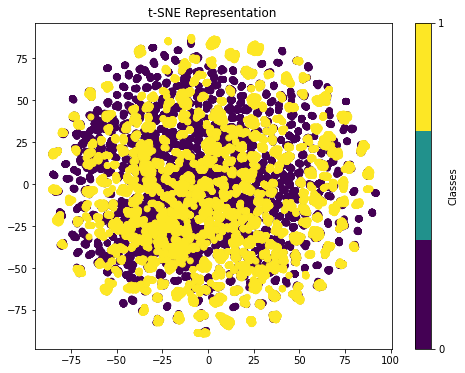

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))
plt.colorbar(ticks=range(2), label='Classes')
plt.title('t-SNE Representation ')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [25]:
model1=Sequential()

model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model1.add(Dense(32, activation='relu'))  
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history1=model1.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
595/595 [==============================] - 1s 1ms/step - loss: 0.6135 - accuracy: 0.6578 - val_loss: 0.5953 - val_accuracy: 0.6782
Epoch 2/50
595/595 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7306 - val_loss: 0.5304 - val_accuracy: 0.7310
Epoch 3/50
595/595 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.7684 - val_loss: 0.4841 - val_accuracy: 0.7629
Epoch 4/50
595/595 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.7942 - val_loss: 0.4849 - val_accuracy: 0.7619
Epoch 5/50
595/595 [==============================] - 1s 1ms/step - loss: 0.3876 - accuracy: 0.8192 - val_loss: 0.4407 - val_accuracy: 0.7858
Epoch 6/50
595/595 [==============================] - 1s 1ms/step - loss: 0.3567 - accuracy: 0.8360 - val_loss: 0.4280 - val_accuracy: 0.7955
Epoch 7/50
595/595 [==============================] - 1s 1ms/step - loss: 0.3298 - accuracy: 0.8511 - val_loss: 0.4211 - val_accuracy: 0.8020
Epoch 

In [27]:
y_pred = model1.predict(X_test)

# Convert predictions to binary values
y_pred_binary = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

186/186 [==============================] - 0s 683us/step
Accuracy: 0.8708809683927371
Precision: 0.8540006375518011
Recall: 0.8962863834058213
F1 Score: 0.8746327130264446


In [28]:
df=pd.read_csv("../Data/ffELAEfficientFormer.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,label
0,0,-0.311707,0.459420,-0.105934,-0.027099,0.813496,-0.097004,-0.015042,0.085467,-0.195130,...,0.269270,0.743087,-0.430609,-0.026296,0.934145,2.190989,1.259573,1.721283,0.869057,0
1,1,0.094533,0.371845,-0.191351,0.003292,0.679079,0.569582,-0.031493,0.560364,-0.260038,...,0.215541,0.710751,-0.121630,-0.148940,0.807394,2.157245,1.398521,2.338162,0.729945,0
2,2,0.074376,0.234607,0.049538,0.231451,0.566247,0.742549,0.049717,0.477335,-0.120970,...,0.178271,0.541171,-0.210184,-0.109294,0.872813,2.513999,1.577552,2.106215,0.815446,0
3,3,-0.039756,-1.313070,0.567037,0.595682,0.440420,-0.268075,-0.027808,0.031323,0.183098,...,-0.147140,0.731044,-0.482814,-0.101063,1.062971,2.972917,0.251622,0.850666,0.179601,0
4,4,-0.274827,-0.995332,0.175439,0.280141,0.477032,0.842147,-0.175154,0.226923,0.442570,...,0.065944,0.442195,-0.328092,0.122477,0.699524,3.154155,0.988861,0.490659,0.458583,0


In [29]:
df=df.drop(columns=["Unnamed: 0"],axis=1)
X=df.drop(columns=["label"],axis=1)
y=df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [30]:
model2=Sequential()

model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model2.add(Dense(32, activation='relu'))  
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history2=model2.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
677/677 [==============================] - 1s 1ms/step - loss: 0.5675 - accuracy: 0.6967 - val_loss: 0.4521 - val_accuracy: 0.7973
Epoch 2/50
677/677 [==============================] - 1s 1ms/step - loss: 0.4037 - accuracy: 0.8224 - val_loss: 0.3637 - val_accuracy: 0.8463
Epoch 3/50
677/677 [==============================] - 1s 1ms/step - loss: 0.3241 - accuracy: 0.8616 - val_loss: 0.3201 - val_accuracy: 0.8684
Epoch 4/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2725 - accuracy: 0.8870 - val_loss: 0.3120 - val_accuracy: 0.8662
Epoch 5/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2382 - accuracy: 0.9020 - val_loss: 0.2978 - val_accuracy: 0.8725
Epoch 6/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2142 - accuracy: 0.9157 - val_loss: 0.2946 - val_accuracy: 0.8832
Epoch 7/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1925 - accuracy: 0.9231 - val_loss: 0.2646 - val_accuracy: 0.8947
Epoch 

In [32]:
y_pred = model2.predict(X_test)

# Convert predictions to binary values
y_pred_binary = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

212/212 [==============================] - 0s 827us/step
Accuracy: 0.9033259423503326
Precision: 0.9145275805570726
Recall: 0.9075880758807588
F1 Score: 0.911044613710555


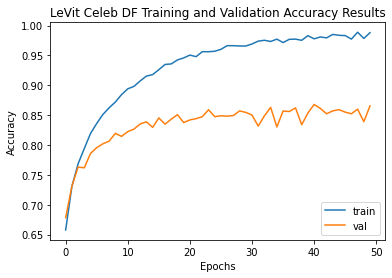

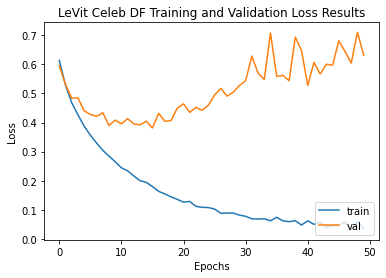

In [33]:
plot(history1,"LeVit Celeb DF")

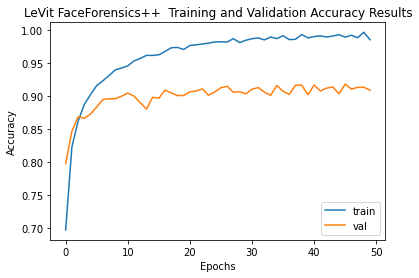

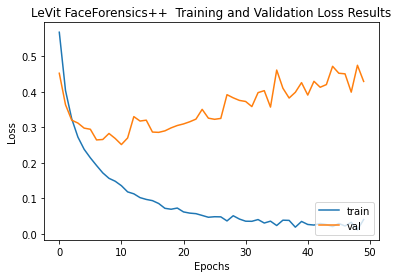

In [34]:
plot(history2,"LeVit FaceForensics++ ")